# Fraud Detection
Tasks
- Explore/Visualize the dataset
- Decide which features are important
- Perform Machine Learning
- Test the model on the testing set

In [3]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import random

# plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

In [18]:
# Read the CSV file
df = pd.read_csv('creditcard.csv', low_memory=False)
# Show the contents
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,46036.0,1.383124,-0.473727,-0.269092,-0.685397,-0.581139,-0.956491,-0.187497,-0.192919,-0.941386,...,0.208031,0.474484,-0.127966,0.085449,0.668673,-0.051763,-0.023889,-0.002531,25.00,0
1,58681.0,-3.468120,-0.763844,0.653345,1.871849,0.774126,-0.612556,-1.164009,1.012409,-0.561714,...,-0.105735,-0.124279,-1.414675,0.148606,0.214405,-0.152914,0.456543,-0.773358,45.64,0
2,28358.0,1.047085,-1.860195,0.569986,-1.381139,-1.708681,0.486737,-1.394539,0.327221,-1.655921,...,0.130376,0.374334,-0.080326,-0.314810,0.051365,-0.074530,0.040114,0.036037,178.00,0
3,164377.0,-0.794528,0.996394,-0.402718,-0.652480,1.153620,0.271515,0.473381,0.641194,-0.101067,...,0.004219,0.153865,0.014484,-1.144432,-0.596392,-0.069092,0.105480,0.116966,17.33,0
4,80254.0,-3.504999,2.892924,-1.548616,-1.644712,-1.130891,-0.048727,-1.563452,2.546492,-0.871279,...,0.288376,-0.095386,0.158928,-1.096405,-0.069475,0.787658,-1.197431,-0.167839,0.90,0


In [38]:
# get statistically summary of all the columns
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.177182e-15  3.385972e-16 -1.399445e-15  2.093630e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.006511e-15  1.494698e-15 -5.619836e-16  1.145123e-16 -2.411994e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [10]:
fraud = df.loc[ df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


# What features are important?

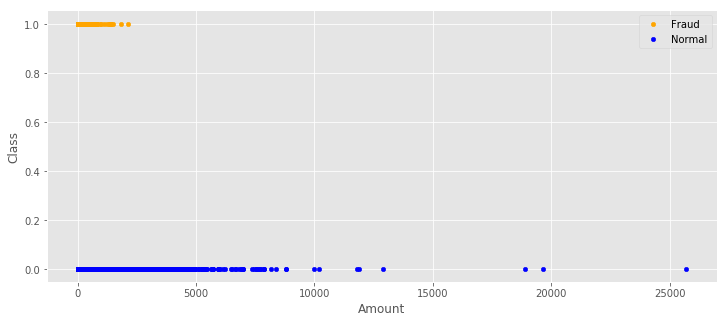

In [22]:
mpl.rc('figure', figsize = (12,5))
style.use('ggplot')# Adjusting the style of matplotlib
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
_ = plt.show()

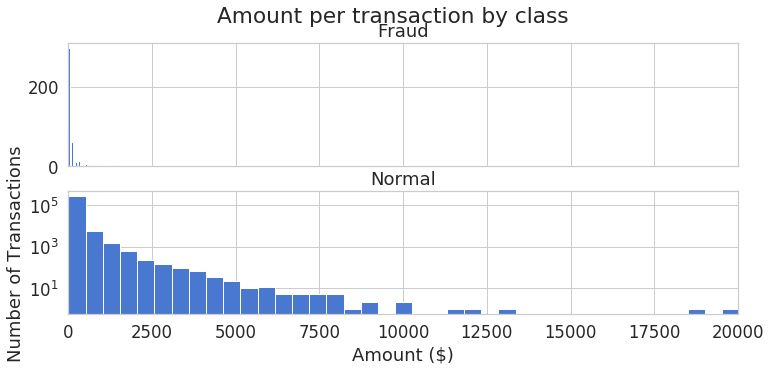

In [44]:
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(non_fraud.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();



Text(0, 0.5, 'Number of transactions')

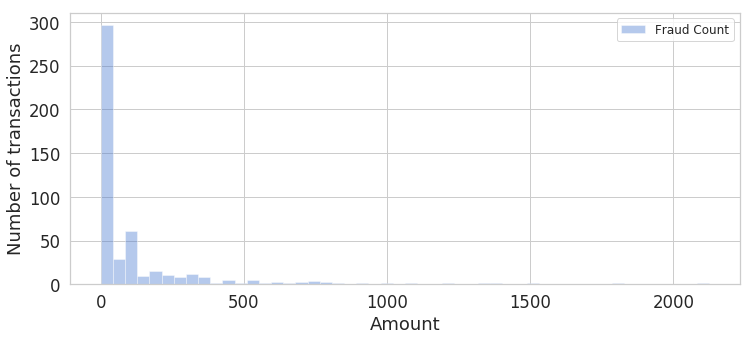

In [64]:
sns.distplot(fraud.Amount, kde=False, label='Fraud Count');
# sns.distplot(non_fraud.Amount, kde=False, label='NONFraud Amount');
plt.legend(prop={'size': 12})
plt.xlabel('Amount')
plt.ylabel('Number of transactions') 

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35)

In [36]:
# Logistic
model_logistic = linear_model.LogisticRegression(C=1e5) # C=1e5 p revents overfitting
model_logistic.fit(X_train, Y_train)
print('model_logistic Score:', model_logistic.score(X_test, Y_test))

# SGD
model_sgd = linear_model.SGDRegressor()
model_sgd.fit(X_train, Y_train)
model_sgd_score = model_sgd.score(X_test, Y_test)
print("model_sgd_score", model_sgd_score)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model_logistic Score: 0.9989867881183351


/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


model_sgd_score -7.563539726427711e+38


In [39]:
from sklearn.metrics import classification_report

y_predicted = np.array(logistic.predict(X_test))
# print(y_predicted)

print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99524
           1       0.71      0.62      0.66       159

   micro avg       1.00      1.00      1.00     99683
   macro avg       0.85      0.81      0.83     99683
weighted avg       1.00      1.00      1.00     99683

